<h2>Importe</h2>

In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import src.data as data
import torch
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import math


<h2>Methoden</h2>

In [2]:
#Straight up stolen from main.py
def calc_roc_auc(gts, probs):
    try:
        auc = metrics.roc_auc_score(gts, probs)
        if np.isnan(auc):
            auc = 0
            return auc
    except:
        print("except")
        return 0


In [3]:
def map_value(value):
    if value >= 0.5:
        return 1
    else:
        return 0

<h2>Laden der gespeicherten Daten und der Modelle</h2>

In [6]:
data_list = []
with open(r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\data_plot\test_data", "rb") as input:
    while True:
        try:
            x = pickle.load(input)
        except EOFError:
            break
        data_list.append(x)



In [7]:
len(data_list)

5

In [8]:
model_list = []
dir = r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\model"
for file in os.listdir(dir):
    filename = os.fsdecode(file)
    if "_15" in filename:
        model_list.append(torch.load(dir + "\\" + file))


In [9]:
len(model_list)

5

In [76]:
lowest_len = math.inf
for ds in data_list:
    if len(ds["x_test_seq"]) < lowest_len:
        lowest_len = len(ds["x_test_seq"])


In [11]:
lowest_len

183

In [59]:
(data_list[0]["x_test_seq"][5:10])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

<h3>Weg 1: x-Achse = Fold</h3>

In [46]:
x_axis = range(0,5)
y_values = []
n = 1
for model in model_list:
    values = {"model" : model, "data" : [], "nr" : n}
    n += 1
    for dataset in data_list:
        with torch.no_grad():
            seq = torch.from_numpy(dataset["x_test_seq"])
            stat = torch.from_numpy(dataset["x_test_stat"])
            prediction = torch.sigmoid(model(seq, stat))
            prediction = prediction.numpy()

            prediction = [map_value([0][0]) for pred in prediction]

            values["data"].append(calc_roc_auc(dataset["label"], prediction))
            #fpr, tpr, x = metrics.roc_curve(dataset["label"], prediction)
            #values["data"].append(metrics.auc(fpr, tpr))
    y_values.append(values)

except
except
except
except
except


<h3>Weg 2: x-Achse = Eintrag im Tensor</h3>
(Geht btw nicht)

In [75]:
x_axis = range(0,lowest_len -1)
y_values = []

n = 0
for model, dataset in zip(model_list,data_list):
    values = {"fold" : dataset["fold"], "data" : []}
    print(n)
    n += 1
    for i in range(0, lowest_len -1): #it's irrelevant which length I use since len(x_test_seq) should be equivalent to len(x_test_stat) and len(label)
        model.eval()
        with torch.no_grad():
            seq = torch.from_numpy(dataset["x_test_seq"][i])
            stat = torch.from_numpy(dataset["x_test_stat"][i])

            prediction = torch.sigmoid(model.forward(seq, stat))
            print(prediction)
        values["data"].append(metrics.auc(dataset["label"][i],prediction))
    y_values.append(values)


TypeError: 'float' object cannot be interpreted as an integer

In [81]:
y_values = []

n = 0
for model, dataset in zip(model_list,data_list):
    values = {"fold" : dataset["fold"], "data" : []}
    print(n)
    n += 1
    i = 5
    pre_i = 0
    while i < lowest_len-1:

        model.eval()
        with torch.no_grad():
            seq = torch.from_numpy(dataset["x_test_seq"][pre_i : i])
            stat = torch.from_numpy(dataset["x_test_stat"][pre_i : i])

            prediction = torch.sigmoid(model.forward(seq, stat))
            prediction = [map_value([0][0]) for pred in prediction]
            print(prediction)
            #values["data"].append(calc_roc_auc(dataset["label"], prediction))
            fpr, tpr, x = metrics.roc_curve(dataset["label"][pre_i : i], prediction)
            values["data"].append(metrics.auc(fpr, tpr))

        pre_i = i
        i += 5
    y_values.append(values)

0
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


C:\Users\ReneJ\anaconda3\envs\PatWay-Net2\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
1
[0, 0, 0, 0, 0]


C:\Users\ReneJ\anaconda3\envs\PatWay-Net2\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\Users\ReneJ\anaconda3\envs\PatWay-Net2\lib\site-packages\sklearn\metrics\_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
2
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0,

In [86]:
y_values[0]["data"]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

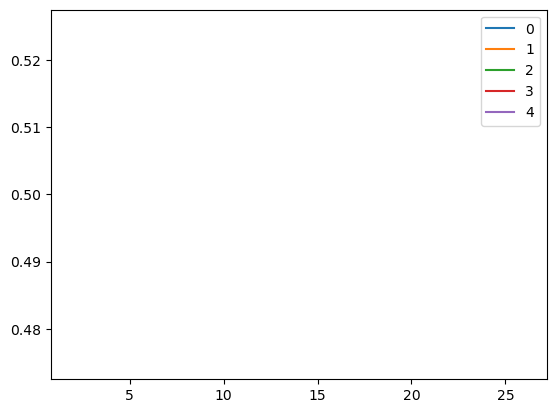

In [85]:

for y in y_values:
    x_axis = range(0, len(y["data"]))
    plt.plot(x_axis, y["data"], label = y["fold"])

plt.legend()
plt.show()